## H1B Visa Prediction

### Load Necessary libraries

In [1]:
# Import necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import dmba
import matplotlib.pylab as plt
import pandas as pd    # Importing the pandas library, which is used for data manipulation and analysis, particularly with DataFrames.
import statsmodels.api as sm    # Importing statsmodels library for statistical modeling and hypothesis testing.
import sklearn as sk    # Importing scikit-learn (sklearn), a popular machine learning library for data preprocessing, model building, and evaluation.
from statsmodels.stats.outliers_influence import variance_inflation_factor    # Importing a method to calculate Variance Inflation Factor (VIF) to check for multicollinearity in features.
from sklearn.model_selection import train_test_split, cross_val_score    # Importing methods for splitting data into training/testing sets and performing cross-validation.
from sklearn.linear_model import LinearRegression    # Importing LinearRegression class to create a linear regression model.
from sklearn.metrics import mean_squared_error, mean_absolute_error    # Importing methods to evaluate model performance using mean squared error and mean absolute error.
from sklearn.feature_selection import SequentialFeatureSelector    # Importing SequentialFeatureSelector for feature selection using a greedy approach.
from sklearn.pipeline import make_pipeline    # Importing make_pipeline to chain multiple steps (preprocessing, modeling) into one pipeline.
from sklearn.linear_model import Ridge    # Importing Ridge regression, a type of linear regression that applies L2 regularization.
from sklearn.preprocessing import StandardScaler    # Importing StandardScaler to standardize features by removing the mean and scaling to unit variance.
from sklearn.linear_model import Lasso    # Importing Lasso regression, a type of linear regression that applies L1 regularization to perform feature selection.
from sklearn.linear_model import ElasticNet    # Importing ElasticNet regression, a combination of Lasso and Ridge regression that applies both L1 and L2 regularization.
import numpy as np    # Importing numpy library for numerical operations, especially with arrays and matrices.
import matplotlib.pyplot as plt    # Importing matplotlib's pyplot module for creating visualizations like plots and graphs.
import seaborn as sns    # Importing seaborn, a statistical data visualization library built on top of matplotlib for creating more attractive and informative plots.
from statsmodels.stats.stattools import durbin_watson    # Importing the Durbin-Watson statistic function to check for autocorrelation in residuals of a regression model.


### Load and Visualize the Data 

In [2]:
import glob

# Replace with your folder path
folder_path = r'C:\Users\mogie\OneDrive\Desktop\UNT\Fall 2024\ADTA 5230\Project'
files = glob.glob(f'{folder_path}/*.csv')

# Load and combine
dataframes = [pd.read_csv(file, low_memory=False) for file in files]
df = pd.concat(dataframes, ignore_index=True)


In [3]:
# print the first few instances of the data
# pd.set_option('display.max_columns', 80)
df.head()

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S1Q1B,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1,T_U_VAWA_FLAG
0,(b)(6),CHN,CHN,(b)(6),1981,male,D&R I.P. Law Firm,453745389,108 N Ynez Ave,Monterey Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(b)(6),IND,IND,(b)(6),1994,male,ITTECHNICA INC,824530582,1825 W Walnut Hill Ln,Irving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(b)(6),CAN,CAN,(b)(6),1988,male,"Tesla, Inc.",912197729,3500 Deer Creek Rd,Palo Alto,...,NaN,G,MASTER'S DEGREE,COMPUTER ENGINEERING,125000,007,336111,B,N,NaN
3,(b)(6),PAK,PAK,(b)(6),1993,male,Crorama Inc.,208487164,391 Thor Pl,Brea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(b)(6),IND,IND,(b)(6),1990,male,XENON INFOTEK INC,223816438,2 Kilmer Rd Ste B,Edison,...,NaN,G,MASTER'S DEGREE,COMPUTER SCI,93496,NaN,541511,B,Y,NaN


### Clean and Preprocess Data

In [4]:
# Print all columns
df.columns

Index(['bcn', 'country_of_birth', 'country_of_nationality',
       'ben_date_of_birth', 'ben_year_of_birth', 'gender', 'employer_name',
       'FEIN', 'mail_addr', 'city', 'state', 'zip', 'agent_first_name',
       'agent_last_name', 'lottery_year', 'status_type', 'ben_multi_reg_ind',
       'RECEIPT_NUMBER', 'rec_date', 'FIRST_DECISION', 'first_decision_date',
       'i129_employer_name', 'PET_STREET', 'PET_CITY', 'PET_STATE', 'PET_ZIP',
       'REQUESTED_CLASS', 'BASIS_FOR_CLASSIFICATION', 'REQUESTED_ACTION',
       'NUMBER_OF_BENEFICIARIES', 'BEN_SEX', 'BEN_COUNTRY_OF_BIRTH',
       'BEN_CURRENT_CLASS', 'JOB_TITLE', 'DOL_ETA_CASE_NUMBER',
       'WORKSITE_STREET', 'WORKSITE_CITY', 'WORKSITE_STATE', 'WORKSITE_ZIP',
       'FULL_TIME_IND', 'WAGE_AMT', 'WAGE_UNIT', 'valid_from', 'valid_to',
       'NUM_OF_EMP_IN_US', 'S1Q1A', 'S1Q1B', 'BEN_EDUCATION_CODE',
       'ED_LEVEL_DEFINITION', 'BEN_PFIELD_OF_STUDY', 'BEN_COMP_PAID',
       'DOT_CODE', 'NAICS_CODE', 'S3Q1', 'S4Q1', 'T_U_VAWA_FL

In [5]:
# Print data types for each column
df.dtypes

bcn                         object
country_of_birth            object
country_of_nationality      object
ben_date_of_birth           object
ben_year_of_birth           object
gender                      object
employer_name               object
FEIN                        object
mail_addr                   object
city                        object
state                       object
zip                         object
agent_first_name            object
agent_last_name             object
lottery_year                object
status_type                 object
ben_multi_reg_ind           object
RECEIPT_NUMBER              object
rec_date                    object
FIRST_DECISION              object
first_decision_date         object
i129_employer_name          object
PET_STREET                  object
PET_CITY                    object
PET_STATE                   object
PET_ZIP                     object
REQUESTED_CLASS             object
BASIS_FOR_CLASSIFICATION    object
REQUESTED_ACTION    

In [6]:
# Define the complete data type mapping using `object` for text columns
data_type_mapping = {
    'bcn': 'object',
    'country_of_birth': 'object',
    'country_of_nationality': 'object',
    'ben_date_of_birth': 'datetime64[ns]',
    'ben_year_of_birth': 'Int64',
    'gender': 'object',
    'employer_name': 'object',
    'FEIN': 'object',
    'mail_addr': 'object',
    'city': 'object',
    'state': 'object',
    'zip': 'object',
    'agent_first_name': 'object',
    'agent_last_name': 'object',
    'lottery_year': 'Int64',
    'status_type': 'object',
    'ben_multi_reg_ind': 'object',
    'RECEIPT_NUMBER': 'object',
    'rec_date': 'datetime64[ns]',
    'FIRST_DECISION': 'object',
    'first_decision_date': 'datetime64[ns]',
    'i129_employer_name': 'object',
    'PET_STREET': 'object',
    'PET_CITY': 'object',
    'PET_STATE': 'object',
    'PET_ZIP': 'object',
    'REQUESTED_CLASS': 'object',
    'BASIS_FOR_CLASSIFICATION': 'object',
    'REQUESTED_ACTION': 'object',
    'NAICS_CODE': 'object',
    'DOT_CODE': 'object',
    'BEN_COMP_PAID': 'float64',
    'S1Q1': 'object',
    'S2Q2': 'object',
    'S3Q1': 'object',
    'S4Q1': 'object',
    'T_U_VAWA_FLAG': 'object',
    'ED_LEVEL_DEFINITION': 'object',
    'BEN_PFIELD_OF_STUDY': 'object',
    'BEN_EDUCATION_CODE': 'object',
    'ED_DEGREE': 'object',
    'BEN_PFIELD_OF_EDU_DEGREE': 'object',
    'EMPLOYMENT_START_DATE': 'datetime64[ns]',
    'EMPLOYMENT_END_DATE': 'datetime64[ns]',
    'DOT_OCCUPATION': 'object',
    'WORKSITE_STATE': 'object',
    'WORKSITE_POSTAL_CODE': 'object',
    'JOB_TITLE': 'object',
    'SOC_CODE': 'object',
    'WAGE_AMT':'float64',
    'CASE_SUBMISSION_DATE': 'datetime64[ns]'
}

# Define a helper function for consistent datetime parsing
def convert_to_datetime(df, column, date_format=None):
    try:
        if date_format:
            # Use the specified date format
            df[column] = pd.to_datetime(df[column], format=date_format, errors='coerce')
        else:
            # Infer format if not specified
            df[column] = pd.to_datetime(df[column], errors='coerce')
    except Exception as e:
        print(f"Error converting column {column} to datetime: {e}")

# Define a helper function for cleaning and converting to numeric
def clean_and_convert_to_numeric(df, column, dtype):
    try:
        # Clean the column by removing unwanted characters (like (b)(3) etc.)
        df[column] = df[column].replace(r'\(b\)\(\d+\)', '', regex=True)  # Removes patterns like (b)(3)

        # Convert the column to the appropriate numeric type
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Coerce invalid values to NaN
    except Exception as e:
        print(f"Error cleaning and converting column {column} to {dtype}: {e}")

# Apply the data type mapping with error handling
for column, dtype in data_type_mapping.items():
    if column in df.columns:
        try:
            if 'datetime64' in dtype:
                # Convert datetime columns
                common_date_format = "%Y-%m-%d"  # Example format, adjust based on your data
                convert_to_datetime(df, column, date_format=common_date_format)
            elif 'Int64' in dtype:
                # Clean and convert integer columns
                clean_and_convert_to_numeric(df, column, dtype)
                df[column] = df[column].astype('Int64')
            elif 'float64' in dtype:
                # Clean and convert float columns
                clean_and_convert_to_numeric(df, column, dtype)
                df[column] = df[column].astype('float64')
            else:
                # Convert to object type for other columns
                df[column] = df[column].astype('object')
        except Exception as e:
            print(f"Error converting column {column} to {dtype}: {e}")
# Save the cleaned DataFrame (optional)
# df.to_csv('cleaned_TRK_13139_FY2021.csv', index=False)


In [7]:
# print the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045292 entries, 0 to 1045291
Data columns (total 56 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   bcn                       1045292 non-null  object        
 1   country_of_birth          1045292 non-null  object        
 2   country_of_nationality    1045292 non-null  object        
 3   ben_date_of_birth         0 non-null        datetime64[ns]
 4   ben_year_of_birth         1045180 non-null  Int64         
 5   gender                    1045292 non-null  object        
 6   employer_name             1045292 non-null  object        
 7   FEIN                      1045292 non-null  object        
 8   mail_addr                 1045292 non-null  object        
 9   city                      1045292 non-null  object        
 10  state                     1045292 non-null  object        
 11  zip                       1045292 non-null  object

In [8]:
# pint the shape of the dataset
df.shape

(1045292, 56)

In [9]:
# Print the number of missing data
df.isnull().sum()

bcn                               0
country_of_birth                  0
country_of_nationality            0
ben_date_of_birth           1045292
ben_year_of_birth               112
gender                            0
employer_name                     0
FEIN                              0
mail_addr                         0
city                              0
state                             0
zip                               0
agent_first_name                446
agent_last_name                1361
lottery_year                    112
status_type                       0
ben_multi_reg_ind                 0
RECEIPT_NUMBER               761045
rec_date                    1045292
FIRST_DECISION               761364
first_decision_date         1045292
i129_employer_name           761048
PET_STREET                   761050
PET_CITY                     761045
PET_STATE                    761047
PET_ZIP                      761049
REQUESTED_CLASS              761051
BASIS_FOR_CLASSIFICATION    

In [10]:
# Calculate the proportion of missing values for each column
missing_values = df.isnull().mean() * 100  # Multiply by 100 to express it as a percentage

# Display the result
print("Proportion of missing values in each column (%):")
print(missing_values)

Proportion of missing values in each column (%):
bcn                           0.000000
country_of_birth              0.000000
country_of_nationality        0.000000
ben_date_of_birth           100.000000
ben_year_of_birth             0.010715
gender                        0.000000
employer_name                 0.000000
FEIN                          0.000000
mail_addr                     0.000000
city                          0.000000
state                         0.000000
zip                           0.000000
agent_first_name              0.042668
agent_last_name               0.130203
lottery_year                  0.010715
status_type                   0.000000
ben_multi_reg_ind             0.000000
RECEIPT_NUMBER               72.806929
rec_date                    100.000000
FIRST_DECISION               72.837446
first_decision_date         100.000000
i129_employer_name           72.807216
PET_STREET                   72.807407
PET_CITY                     72.806929
PET_STATE      

In [11]:
# Drop columns
columns_to_drop = [
    'bcn','ben_date_of_birth', 'FEIN', 'agent_first_name', 'agent_last_name', 'mail_addr', 'city', 'state','zip', 'rec_date', 
    'RECEIPT_NUMBER', 'ben_multi_reg_ind', 'S1Q1A', 'S1Q1B', 'T_U_VAWA_FLAG', 'PET_STREET', 'PET_CITY','PET_STATE','PET_ZIP',
    'BASIS_FOR_CLASSIFICATION','REQUESTED_ACTION', 'NUMBER_OF_BENEFICIARIES' 'PET_STREET','PET_CITY','PET_STATE','PET_ZIP', 'DOL_ETA_CASE_NUMBER',
    'NAICS_CODE','DOT_CODE','valid_from', 'WORKSITE_STREET','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_ZIP','valid_to','S3Q1', 'S4Q1','BEN_COMP_PAID',
    'first_decision_date'
]

# Filter out columns that do not exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the columns
df.drop(columns=existing_columns_to_drop, inplace=True)

# Display the updated shape
print(df.shape)


(1045292, 22)


In [12]:
# Change to Date-tme
from datetime import datetime
# Get the current year
current_year = datetime.now().year

# Calculate the age based on the most recent year between 'lottery_year' and the current year
df['applicant_age'] = current_year - df['ben_year_of_birth']

# Handle missing or invalid year of birth data (if any)
df['applicant_age'] = df['applicant_age'].where(df['applicant_age'].notnull() & (df['applicant_age'] > 0))

# Display the new DataFrame with the added 'applicant_age' column
df.head()

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,lottery_year,status_type,FIRST_DECISION,i129_employer_name,REQUESTED_CLASS,...,BEN_CURRENT_CLASS,JOB_TITLE,FULL_TIME_IND,WAGE_AMT,WAGE_UNIT,NUM_OF_EMP_IN_US,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,applicant_age
0,CHN,CHN,1981,male,D&R I.P. Law Firm,2021,CREATED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
1,IND,IND,1994,male,ITTECHNICA INC,2021,CREATED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
2,CAN,CAN,1988,male,"Tesla, Inc.",2021,SELECTED,Approved,TESLA INC,1B1,...,UU,SR MANUFACTURING CONTROLS DEV ENGI,NaN,NaN,NaN,0,G,MASTER'S DEGREE,COMPUTER ENGINEERING,36
3,PAK,PAK,1993,male,Crorama Inc.,2021,CREATED,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
4,IND,IND,1990,male,XENON INFOTEK INC,2021,SELECTED,Denied,XENON INFOTEK INC,1B1,...,F1,NaN,NaN,NaN,NaN,0,G,MASTER'S DEGREE,COMPUTER SCI,34


Identify a constant if it has the same value for all observations in the dataset.

In [13]:
# identify constants
constants = [
    val for val in df.columns if len(df[val].fillna(0).unique()) == 1
]

constants


[]

A feature is quasi-constant if it has one dominant value that appears in a large majority of the observations (often over 98% or 99%).

In [14]:
# identify quasi constant values (sometimes these may be boolean features)
quasi_consts = []
for val in df.columns.sort_values():
    if (len(df[val].unique()) < 3):
        val_counts = df[val].value_counts(normalize=True)
        print(val_counts)
        if list(val_counts)[0] > .98:
            quasi_consts.append(val)

print('quasi_consts', quasi_consts)

quasi_consts []


In [15]:
# check of duplicate columns
duplicate_variables = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for dupe in df.columns[i + 1:]:
        if df[orig].equals(df[dupe]):
            duplicate_variables.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_variables

[]

In [16]:
# print the descriptive statistics
df.describe()

,ben_year_of_birth,lottery_year,WAGE_AMT,applicant_age
count,1045180.0,1045180.0,9.401500e+04,1045179.0
mean,1989.394555,2022.196145,1.747544e+05,34.605481
std,5.921382,0.82045,2.148108e+07,5.92127
min,1900.0,2021.0,0.000000e+00,2.0
25%,1986.0,2021.0,7.685600e+04,30.0
50%,1991.0,2022.0,9.240000e+04,33.0
75%,1994.0,2023.0,1.150800e+05,38.0
max,2027.0,2023.0,6.585366e+09,124.0


In [17]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045292 entries, 0 to 1045291
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   country_of_birth         1045292 non-null  object 
 1   country_of_nationality   1045292 non-null  object 
 2   ben_year_of_birth        1045180 non-null  Int64  
 3   gender                   1045292 non-null  object 
 4   employer_name            1045292 non-null  object 
 5   lottery_year             1045180 non-null  Int64  
 6   status_type              1045292 non-null  object 
 7   FIRST_DECISION           283928 non-null   object 
 8   i129_employer_name       284244 non-null   object 
 9   REQUESTED_CLASS          284241 non-null   object 
 10  NUMBER_OF_BENEFICIARIES  282135 non-null   object 
 11  BEN_SEX                  284187 non-null   object 
 12  BEN_COUNTRY_OF_BIRTH     284040 non-null   object 
 13  BEN_CURRENT_CLASS        228679 non-null  

In [18]:
# Calculate the proportion of missing values for each of the remaining column after ropping some columns
missing_values = df.isnull().mean() * 100  # Multiply by 100 to express it as a percentage

# Display the result
print("Proportion of missing values in each column (%):")
print(missing_values)

Proportion of missing values in each column (%):
country_of_birth            0.000000
country_of_nationality      0.000000
ben_year_of_birth           0.010715
gender                      0.000000
employer_name               0.000000
lottery_year                0.010715
status_type                 0.000000
FIRST_DECISION             72.837446
i129_employer_name         72.807216
REQUESTED_CLASS            72.807503
NUMBER_OF_BENEFICIARIES    73.008977
BEN_SEX                    72.812669
BEN_COUNTRY_OF_BIRTH       72.826732
BEN_CURRENT_CLASS          78.122955
JOB_TITLE                  82.740899
FULL_TIME_IND              95.277683
WAGE_AMT                   91.005862
WAGE_UNIT                  90.993904
NUM_OF_EMP_IN_US           72.973007
BEN_EDUCATION_CODE         76.221381
ED_LEVEL_DEFINITION        76.221381
BEN_PFIELD_OF_STUDY        72.822235
applicant_age               0.010810
dtype: float64


In [19]:
# drop NaN
df = df.dropna()
df.shape

(21375, 23)

In [20]:
# Check null values again
df.isnull().sum()

country_of_birth           0
country_of_nationality     0
ben_year_of_birth          0
gender                     0
employer_name              0
lottery_year               0
status_type                0
FIRST_DECISION             0
i129_employer_name         0
REQUESTED_CLASS            0
NUMBER_OF_BENEFICIARIES    0
BEN_SEX                    0
BEN_COUNTRY_OF_BIRTH       0
BEN_CURRENT_CLASS          0
JOB_TITLE                  0
FULL_TIME_IND              0
WAGE_AMT                   0
WAGE_UNIT                  0
NUM_OF_EMP_IN_US           0
BEN_EDUCATION_CODE         0
ED_LEVEL_DEFINITION        0
BEN_PFIELD_OF_STUDY        0
applicant_age              0
dtype: int64

In [21]:
# # Correct file path with a filename and extension
# output_file_path = 'C:\\Users\\mogie\\OneDrive\\Desktop\\UNT\\Fall 2024\\ADTA 5230\\cleaned_dataset.csv'

# # Convert DataFrame to CSV
# df.to_csv(output_file_path, index=False)

# print(f"DataFrame successfully saved to {output_file_path}")


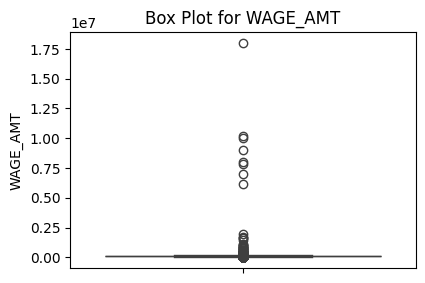

Outliers removed from WAGE_AMT: 1742
Remaining rows after outlier removal: 19633


In [22]:
# Detect ad Drop Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect and drop outliers using the IQR method
def drop_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}: {len(df) - len(df_cleaned)}")
    return df_cleaned

# Create a copy of the original DataFrame to drop outliers
df_cleaned = df.copy()

# Select only the numeric columns in the DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# List of columns to exclude from outlier removal
exclude_columns = ['ben_year_of_birth', 'lottery_year', 'applicant_age']

# Create a figure for the box plots before outlier removal
plt.figure(figsize=(12, 8))

# Loop through numeric columns and create a box plot for each
for i, col in enumerate(numeric_cols):
    if col not in exclude_columns:
        plt.subplot(3, 3, i + 1)  # Adjust the subplot grid as needed
        sns.boxplot(y=df[col])  # Use y to make the box plot vertical
        plt.title(f'Box Plot for {col}')
        plt.tight_layout()

plt.show()  # Display the box plots before outlier removal

# Apply the function to each numeric column (excluding the specified ones) and update the DataFrame
for col in numeric_cols:
    if col not in exclude_columns:
        df_cleaned = drop_outliers(df_cleaned, col)

# Display the cleaned DataFrame (after removing outliers)
print(f"Remaining rows after outlier removal: {len(df_cleaned)}")


In [23]:
# Identify duplicate rows
df[df.duplicated(keep=False)]
df.drop_duplicates(keep='first')  # Drops duplicates and Keeps the first occurrence of duplicates

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,lottery_year,status_type,FIRST_DECISION,i129_employer_name,REQUESTED_CLASS,...,BEN_CURRENT_CLASS,JOB_TITLE,FULL_TIME_IND,WAGE_AMT,WAGE_UNIT,NUM_OF_EMP_IN_US,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,applicant_age
570888,IND,IND,1982,female,Scientific Games LLC,2023,SELECTED,Approved,SCIENTIFIC GAMES LLC,1B1,...,L1,SENIOR SOFTWARE ENGINEER,Y,114250.0,YEAR,1244,F,BACHELOR'S DEGREE,MATHEMATICS,42
570911,RUS,RUS,1997,female,"TRINITY PARTNERS, LLC",2023,SELECTED,Approved,TRINITY PARTNERS LLC,1B1,...,F1,PROJECT COORDINATOR STRATEGIC OPERATIONS,Y,74000.0,YEAR,599,G,MASTER'S DEGREE,PROJECT MANAGEMENT,27
570972,IND,IND,1988,male,Dazzlon Computer Services Inc,2023,SELECTED,Approved,DAZZLON COMPUTER SERVICES INC,1B1,...,UU,Software Developer,Y,95000.0,YEAR,23,G,MASTER'S DEGREE,INFORMATION SYSTEMS BASED ON EDUCATION,36
570982,CHN,CHN,1992,female,Sagepath Reply LLC,2023,SELECTED,Approved,SAGEPATH REPLY LLC,1B1,...,F1,Jr Product Designer,Y,68000.0,YEAR,89,G,MASTER'S DEGREE,GRAPHIC DESIGN AND VISUAL EXPERIENCE,32
570984,IND,IND,1990,female,"LORSHI SYSTEMS, LLC",2023,SELECTED,Approved,LORSHI SYSTEMS LLC,1B1,...,F1,SOFTWARE ENGINEER,Y,101754.0,YEAR,40,G,MASTER'S DEGREE,INFO TECH MGT,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045181,IND,IND,1994,male,Smartsheet Inc.,2023,SELECTED,Approved,SMARTSHEET INC,1B1,...,UN,DATA ANALYST,Y,123000.0,YEAR,2259,G,MASTER'S DEGREE,MECHANICAL ENGINEERING,30
1045216,IND,IND,1997,male,Intel Corporation,2023,SELECTED,Approved,INTEL CORPORATION,1B1,...,F1,Product Engineer,Y,107000.0,YEAR,53000,G,MASTER'S DEGREE,ELECTRICAL & COMP ENGRG,27
1045234,IND,IND,1989,male,SIRI CONSULTANCY SERVICES INC,2023,SELECTED,Denied,SIRI CONSULTANCY SERVICES INC,1B1,...,UU,SOFTWARE ENGINEER,Y,85000.0,YEAR,5,F,BACHELOR'S DEGREE,ELECTRONICS & COMMUNICATION ENGINEERING,35
1045251,IND,IND,1993,male,INSPIRIX TECHNOLOGIES LLC,2023,SELECTED,Denied,INSPIRIX TECHNOLOGIES LLC,1B1,...,F1,Data Engineer,Y,80000.0,YEAR,37,G,MASTER'S DEGREE,BUSINESS ANALYTICS,31


We try to check if there are duplicate rows but from observation of the data, the rows are not actually duplicated. So we're not dropping any of the rows.

### Exploratory Data Analysis

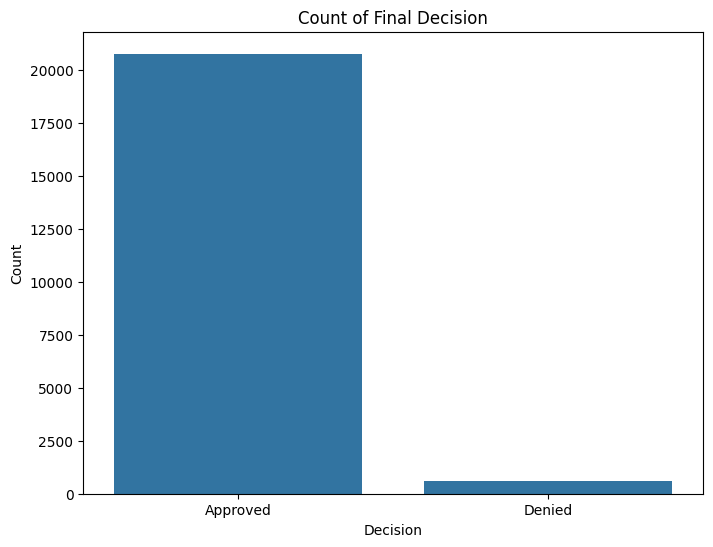

In [24]:
# Count of Final Decision
plt.figure(figsize=(8, 6))
sns.countplot(x='FIRST_DECISION', data=df)
plt.title('Count of Final Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
# plt.savefig('Survival_Counts.png')
plt.show()


Data is imbalanced as there are more 'Approved' class than 'Denied' class.

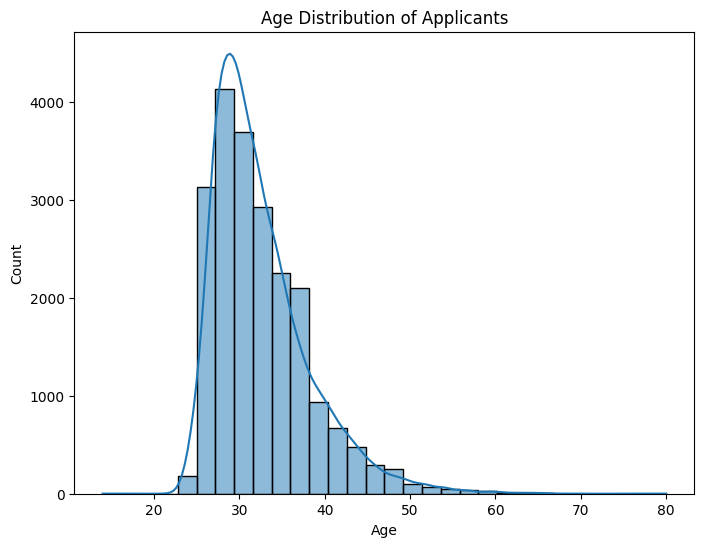

In [25]:
# Plotting age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['applicant_age'], bins=30, kde=True)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age')
plt.ylabel('Count')
# plt.savefig('Age_Distribution.png')
plt.show()


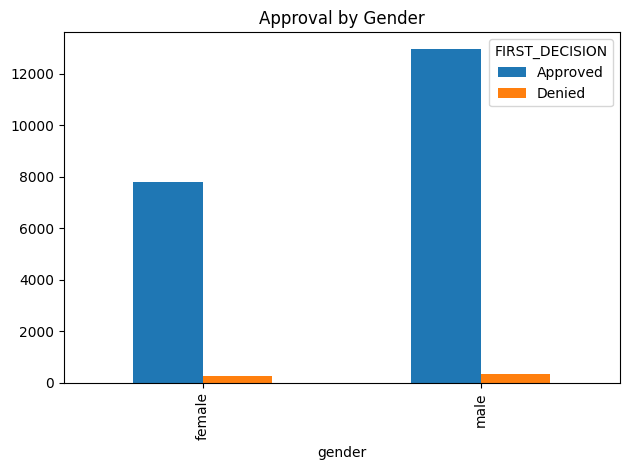

In [26]:
# Approval by Gender
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby(['gender','FIRST_DECISION'])['FIRST_DECISION'].count().unstack().plot.bar()
plt.title('Approval by Gender')
plt.tight_layout();



In [27]:
# Map the income into certain range
# Low Income: Below $30,000.
# Middle Income: Between $30,000 to $100,000.
# High Income: Above $100,000

# point of interest
def group_income(row):
  if row.WAGE_AMT <=30000:
    return 'Low_Income'
  elif row.WAGE_AMT >30000 and row.WAGE_AMT <=100000:
    return 'Mid_Income'
  else:
    return 'High_Income'

df['WAGE_AMT'] =df.apply(group_income, axis=1)
df['WAGE_AMT'].value_counts()


WAGE_AMT
Mid_Income     10968
High_Income     9184
Low_Income      1223
Name: count, dtype: int64

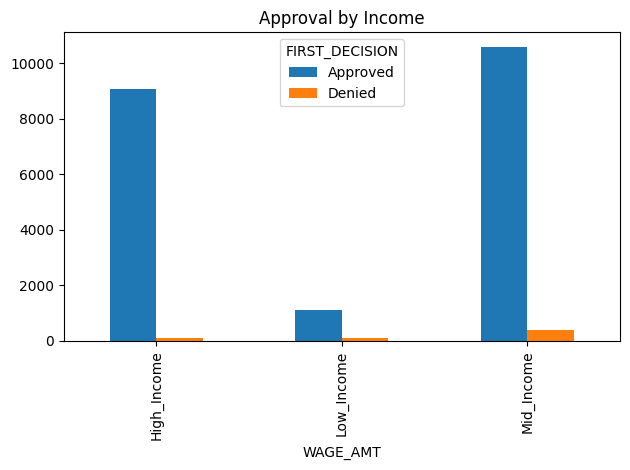

In [28]:
# Approval by Income
df.groupby(['WAGE_AMT','FIRST_DECISION'])['FIRST_DECISION'].count().unstack().plot.bar()
plt.title('Approval by Income')
plt.tight_layout();

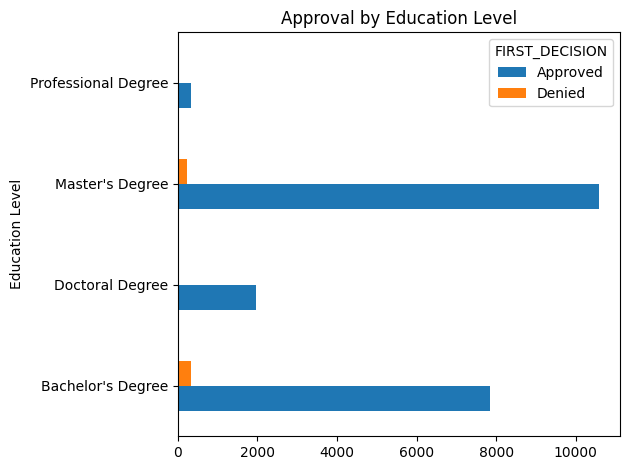

In [29]:
# Approval by Job Title
# BEN_EDUCATION_CODE	Beneficiary's education code
# F : Bachelor's Degree
# G: Master's Degree
# I: Doctoral Degree
# H: Professional Degree
education_map = {
    'F': 'Bachelor\'s Degree',
    'G': 'Master\'s Degree',
    'I': 'Doctoral Degree',
    'H': 'Professional Degree'
}
df_ed = df.copy()
df_ed['Education Level'] = df_ed['BEN_EDUCATION_CODE'].map(education_map)

df_ed.groupby(['Education Level', 'FIRST_DECISION'])['FIRST_DECISION'].count().unstack().plot.barh()
plt.title('Approval by Education Level')
plt.tight_layout()


In [30]:
# Group by 'country_of_nationality' and 'FIRST_DECISION', count occurrences, and unstack
grouped_df = df.groupby(['country_of_nationality', 'FIRST_DECISION'])['FIRST_DECISION'].count().unstack()

# # Reset the index to convert it into a standard DataFrame format
# grouped_df = grouped_df.reset_index()

# Show all rows and columns without truncation
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
grouped_df = grouped_df.fillna(0)
# Display the DataFrame
grouped_df


FIRST_DECISION,Approved,Denied
country_of_nationality,,
AFG,1.0,0.0
AGO,5.0,0.0
ALB,9.0,1.0
ARE,1.0,0.0
ARG,36.0,1.0
ARM,4.0,2.0
ATG,1.0,0.0
AUS,102.0,1.0
AUT,7.0,1.0


### Feature Engineering

In [31]:
# Encode the categorical(object) columns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def auto_encode_dataframe(df, freq_threshold=5):
    """
    This function automatically detects categorical columns and applies:
    - Binary label encoding for binary categorical columns.
    - One-hot encoding for categorical columns with low cardinality.
    - Frequency encoding for categorical columns with high cardinality.
    
    Parameters:
    - df: The DataFrame to encode.
    - freq_threshold: Number of unique labels in a column to apply frequency encoding (default=5).
    
    Returns:
    - Encoded DataFrame.
    """
    
    encoded_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    label_encoder = LabelEncoder()
    ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Step 1: Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Step 2: Apply appropriate encoding
    for col in categorical_cols:
        unique_values = df[col].nunique()
        
        if unique_values == 2:
            # Binary label encoding for columns with exactly 2 unique values
            bi0 = df[col].value_counts().index[0]
            bi1 = df[col].value_counts().index[1]
            encoded_df[col] = df[col].map({bi0: 0, bi1: 1})
            print(f"Binary label mapping applied to: {col}")
        
        elif unique_values <= freq_threshold:
            # One-hot encoding for low cardinality columns (excluding binary ones)
            ohe_df = ohe.fit_transform(df[[col]])
            ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names_out([col]))
            ohe_df.index = df.index
            encoded_df = encoded_df.drop(col, axis=1)  # Drop original column
            encoded_df = encoded_df.join(ohe_df)  # Join one-hot encoded columns
            print(f"One-hot encoding applied to: {col}")
        
        else:
            # Frequency encoding for high cardinality columns
            label_counts = df[col].value_counts(normalize=True)
            encoded_df[col] = df[col].map(label_counts)
            print(f"Frequency encoding applied to: {col}")

    return encoded_df

In [32]:
# Encode the data
encoded_df = auto_encode_dataframe(df)
encoded_df.head()

Frequency encoding applied to: country_of_birth
Frequency encoding applied to: country_of_nationality
Binary label mapping applied to: gender
Frequency encoding applied to: employer_name
One-hot encoding applied to: status_type
Binary label mapping applied to: FIRST_DECISION
Frequency encoding applied to: i129_employer_name
Binary label mapping applied to: REQUESTED_CLASS
Binary label mapping applied to: NUMBER_OF_BENEFICIARIES
One-hot encoding applied to: BEN_SEX
Frequency encoding applied to: BEN_COUNTRY_OF_BIRTH
Frequency encoding applied to: BEN_CURRENT_CLASS
Frequency encoding applied to: JOB_TITLE
Binary label mapping applied to: FULL_TIME_IND
One-hot encoding applied to: WAGE_AMT
One-hot encoding applied to: WAGE_UNIT
Frequency encoding applied to: NUM_OF_EMP_IN_US
Frequency encoding applied to: BEN_EDUCATION_CODE
Frequency encoding applied to: ED_LEVEL_DEFINITION
Frequency encoding applied to: BEN_PFIELD_OF_STUDY


,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,lottery_year,FIRST_DECISION,i129_employer_name,REQUESTED_CLASS,NUMBER_OF_BENEFICIARIES,BEN_COUNTRY_OF_BIRTH,BEN_CURRENT_CLASS,JOB_TITLE,FULL_TIME_IND,NUM_OF_EMP_IN_US,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,applicant_age,BEN_SEX_M,BEN_SEX_U,WAGE_AMT_Low_Income,WAGE_AMT_Mid_Income,WAGE_UNIT_MONTH,WAGE_UNIT_WEEK,WAGE_UNIT_YEAR
570888,0.593731,0.590129,1982,1,0.000047,2023,0,0.000047,0,0,0.593170,0.003556,0.004211,0,0.000047,0.382877,0.382877,0.003696,42,0.0,0.0,0.0,0.0,0.0,0.0,1.0
570911,0.003743,0.003415,1997,1,0.000187,2023,0,0.000187,0,0,0.003883,0.621053,0.000047,0,0.000187,0.505918,0.505918,0.001637,27,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570972,0.593731,0.590129,1988,0,0.000374,2023,0,0.000374,0,0,0.593170,0.169263,0.015485,0,0.004865,0.505918,0.505918,0.000047,36,1.0,0.0,0.0,1.0,0.0,0.0,1.0
570982,0.167205,0.161637,1992,1,0.000047,2023,0,0.000047,0,0,0.167251,0.621053,0.000047,0,0.000561,0.505918,0.505918,0.000140,32,0.0,0.0,0.0,1.0,0.0,0.0,1.0
570984,0.593731,0.590129,1990,1,0.000187,2023,0,0.000187,0,0,0.593170,0.621053,0.063673,0,0.007579,0.505918,0.505918,0.000327,34,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Scaling the numerical columns in the dataset to be in the same range
from sklearn.preprocessing import StandardScaler
df = encoded_df.copy()
 
# Initialize the scaler
scaler = StandardScaler()

# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.describe()

,country_of_birth,country_of_nationality,ben_year_of_birth,gender,employer_name,lottery_year,FIRST_DECISION,i129_employer_name,REQUESTED_CLASS,NUMBER_OF_BENEFICIARIES,BEN_COUNTRY_OF_BIRTH,BEN_CURRENT_CLASS,JOB_TITLE,FULL_TIME_IND,NUM_OF_EMP_IN_US,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,applicant_age,BEN_SEX_M,BEN_SEX_U,WAGE_AMT_Low_Income,WAGE_AMT_Mid_Income,WAGE_UNIT_MONTH,WAGE_UNIT_WEEK,WAGE_UNIT_YEAR
count,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,21375.0,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04,2.137500e+04
mean,-1.362912e-16,7.845057e-17,8.292657e-15,9.872804e-17,3.590111e-17,0.0,4.620605e-17,-1.662088e-17,6.980771e-18,1.329671e-18,-9.041760e-17,1.050440e-16,7.180221e-17,2.659341e-18,-2.260440e-17,-4.401210e-16,-4.401210e-16,-2.144094e-17,4.706203e-16,-2.559616e-17,9.972530e-18,4.953023e-17,1.313050e-17,6.648353e-19,-9.972530e-19,1.588956e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.0,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.466870e+00,-1.449556e+00,-8.354958e+00,-7.777212e-01,-4.506883e-01,0.0,-1.697980e-01,-4.508276e-01,-9.673469e-03,-6.840016e-03,-1.465139e+00,-1.607842e+00,-4.509386e-01,-1.347147e-01,-8.943128e-01,-3.150887e+00,-3.150887e+00,-5.686681e-01,-3.266702e+00,-1.282102e+00,-4.985675e-02,-2.463509e-01,-1.026599e+00,-2.269107e-02,-2.163458e-02,-4.234700e+00
25%,-8.253156e-01,-8.282250e-01,-4.310991e-01,-7.777212e-01,-4.506883e-01,0.0,-1.697980e-01,-4.508276e-01,-9.673469e-03,-6.840016e-03,-8.230366e-01,-9.599883e-01,-4.509386e-01,-1.347147e-01,-7.703757e-01,-2.196506e-01,-2.196506e-01,-5.633441e-01,-8.015011e-01,-1.282102e+00,-4.985675e-02,-2.463509e-01,-1.026599e+00,-2.269107e-02,-2.163458e-02,2.361442e-01
50%,8.116992e-01,8.193641e-01,2.732439e-01,-7.777212e-01,-4.311074e-01,0.0,-1.697980e-01,-4.311913e-01,-9.673469e-03,-6.840016e-03,8.125826e-01,7.697112e-01,-4.349701e-01,-1.347147e-01,-3.753262e-01,7.224430e-01,7.224430e-01,-4.419569e-01,-2.732439e-01,7.799693e-01,-4.985675e-02,-2.463509e-01,9.740899e-01,-2.269107e-02,-2.163458e-02,2.361442e-01
75%,8.116992e-01,8.193641e-01,8.015011e-01,1.285808e+00,-1.080221e-01,0.0,-1.697980e-01,-1.071932e-01,-9.673469e-03,-6.840016e-03,8.125826e-01,7.697112e-01,-2.593171e-01,-1.347147e-01,5.851865e-01,7.224430e-01,7.224430e-01,4.146213e-02,4.310991e-01,7.799693e-01,-4.985675e-02,-2.463509e-01,9.740899e-01,-2.269107e-02,-2.163458e-02,2.361442e-01
max,8.116992e-01,8.193641e-01,3.266702e+00,1.285808e+00,4.003972e+00,0.0,5.889353e+00,4.006601e+00,1.033755e+02,1.461985e+02,8.125826e-01,7.697112e-01,3.168579e+00,7.423097e+00,3.675868e+00,7.224430e-01,7.224430e-01,2.481983e+00,8.354958e+00,7.799693e-01,2.005746e+01,4.059250e+00,9.740899e-01,4.407019e+01,4.622229e+01,2.361442e-01


### Logistic Regression

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define target and features
target = 'FIRST_DECISION'
X = encoded_df.drop(columns=[target])  # Independent variables
y = encoded_df[target]  # Dependent variable

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_model = LogisticRegression(max_iter=10000, class_weight={0: 0.1, 1: 0.9}) # Class_weight set to balanced to balance dataset due to class imbalance
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9609


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6228
           1       0.16      0.08      0.11       185

    accuracy                           0.96      6413
   macro avg       0.56      0.53      0.54      6413
weighted avg       0.95      0.96      0.95      6413



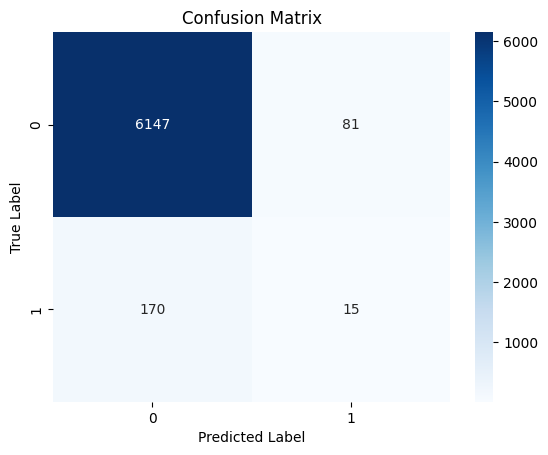

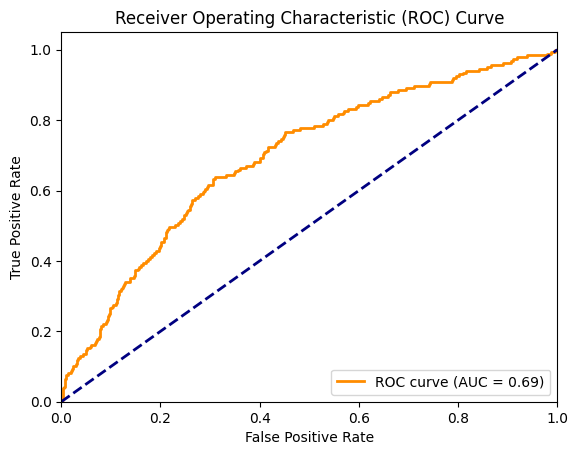

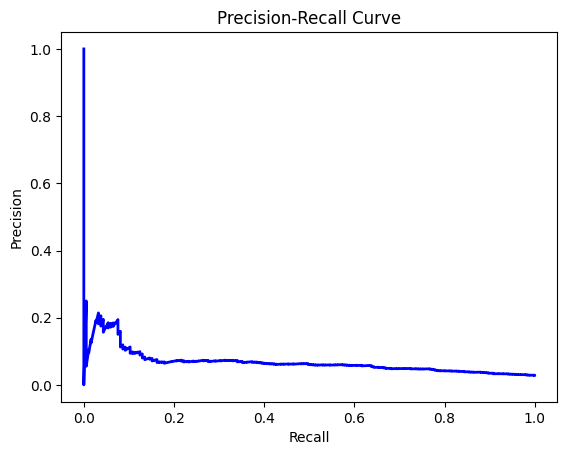

In [36]:
## 1. Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### 2. Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4. Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Random Undersampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight={0: 0.1, 1: 0.9}) 

# Fit the model on the balanced data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7302


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      6228
           1       0.06      0.62      0.12       185

    accuracy                           0.73      6413
   macro avg       0.52      0.68      0.48      6413
weighted avg       0.96      0.73      0.82      6413



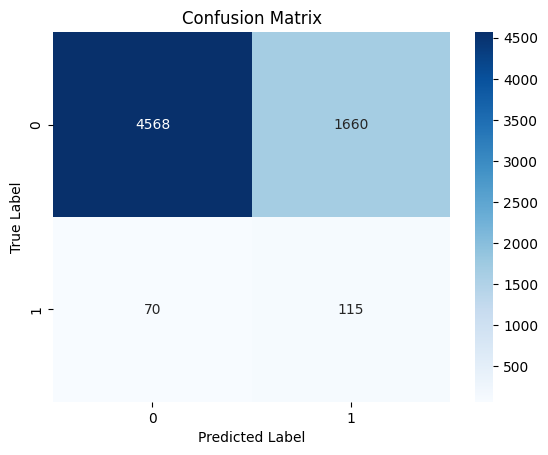

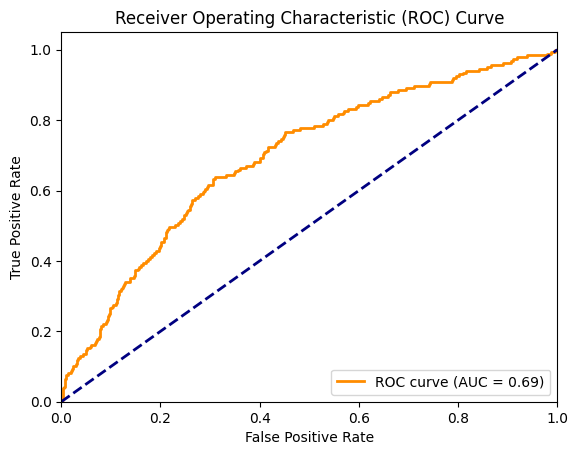

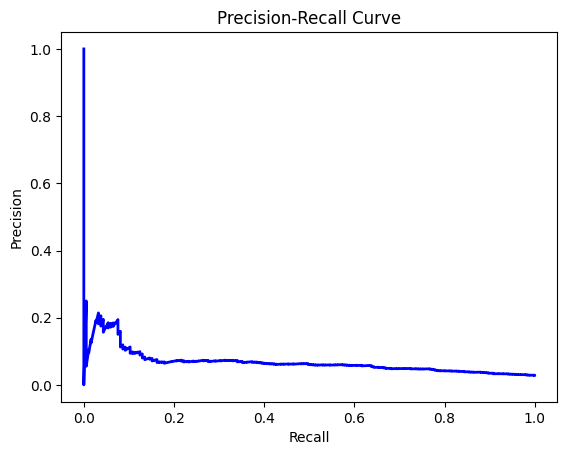

In [38]:
## 1. Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

### 2. Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4. Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



Top 10 Most Important Features:
                    Feature  Importance
13        NUM_OF_EMP_IN_US    0.145614
16     BEN_PFIELD_OF_STUDY    0.109270
11               JOB_TITLE    0.107301
2        ben_year_of_birth    0.089508
17           applicant_age    0.087732
6       i129_employer_name    0.087427
4            employer_name    0.085224
10       BEN_CURRENT_CLASS    0.046254
1   country_of_nationality    0.039535
0         country_of_birth    0.035609


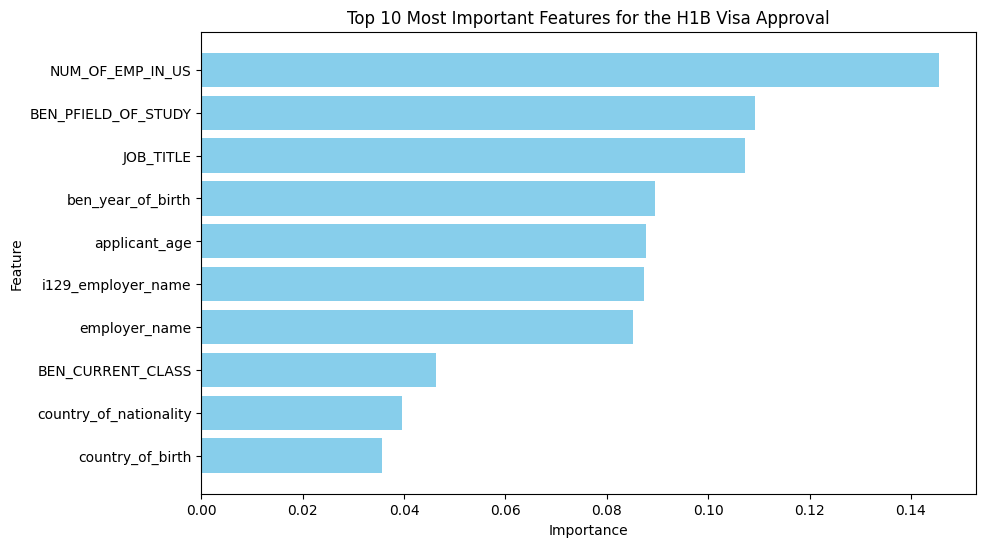

In [39]:
# Feature importance
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns  # If using a DataFram

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:\n", importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for the H1B Visa Approval')
plt.gca().invert_yaxis()
plt.show()
